In [1]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\\Users\\pares\\Downloads\\ds_questions\\ds_questions\\massandopolis')
os.getcwd()

'C:\\Users\\pares\\Downloads\\ds_questions\\ds_questions\\massandopolis'

In [3]:
#what's my data?
all_files = glob.glob('*.csv')
all_files

['allergies.csv',
 'careplans.csv',
 'concepts.csv',
 'conditions.csv',
 'encounters.csv',
 'imaging_studies.csv',
 'immunizations.csv',
 'medications.csv',
 'observations.csv',
 'organizations.csv',
 'patients.csv',
 'patients_updated.csv',
 'procedures.csv',
 'providers.csv']

### Summary
-  Uptill now, we found people in Massandapolis were suferring from addiction related issues in the 1990s which claimed a lot of lives. I want to understand how fit the people were?
- For that, we'll look at immunizations and observations table and analyze the health paramters for different patients and analyze how many individuals were vaccinated and how many weren't.




In [119]:
observations = pd.read_csv('observations.csv')
observations.columns = [i.lower() for i in observations.columns]
observations.info()
observations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199998 entries, 0 to 3199997
Data columns (total 8 columns):
date           object
patient        object
encounter      object
code           object
description    object
value          object
units          object
type           object
dtypes: object(8)
memory usage: 195.3+ MB


,date,patient,encounter,code,description,value,units,type
0,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,8302-2,Body Height,55.2,cm,numeric
1,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,3.4,{score},numeric
2,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,29463-7,Body Weight,4.3,kg,numeric
3,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,8462-4,Diastolic Blood Pressure,74.6,mm[Hg],numeric
4,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,8480-6,Systolic Blood Pressure,128.2,mm[Hg],numeric


In [120]:
#lets first fix our columns
observations.date = observations.date.apply(pd.to_datetime)

In [121]:
observations.value.value_counts().nlargest(5)

Never smoker     115279
Former smoker     47830
1.0               18898
3.9               16825
4.0               15436
Name: value, dtype: int64

In [122]:
#we also have textual values in the "value" column
observations.loc[(observations.value == 'Never smoker') | (observations.value == 'Former smoker'),'description'].value_counts()

Tobacco smoking status NHIS    163109
Name: description, dtype: int64

In [123]:
observations.isna().sum()

date                0
patient             0
encounter           0
code                0
description         0
value              29
units          169450
type                0
dtype: int64

In [124]:
#lets see how many different metrics do we have in total
observations.description.value_counts()

Pain severity - 0-10 verbal numeric rating [Score] - Reported               217754
Diastolic Blood Pressure                                                    165138
Systolic Blood Pressure                                                     165138
Body Height                                                                 163795
Tobacco smoking status NHIS                                                 163795
Body Weight                                                                 163795
Body Mass Index                                                             150086
Potassium                                                                    97070
Urea Nitrogen                                                                97070
Sodium                                                                       97070
Calcium                                                                      97070
Chloride                                                                     97070
Carb

In [125]:
#How many rows are there for every patient?
observations.groupby('patient').size().sort_values(ascending = False).nlargest(10)

patient
e303fe35-bda1-4112-a74c-a916025b3152    17841
2b4079aa-99e2-4228-9d13-9e14f67070e8    16717
ee16ecac-29a0-453f-87dc-a1672879febe    15985
a9aedadc-8633-4578-8b1b-295af0d7afcd    15791
7a947108-2bd6-4245-92e3-e8a5125f8f24    14894
9c4713b1-936f-415d-aaee-1b059e015d88    14573
58d6ab43-5e3d-4b5c-98f5-473a8b18e1f0    13731
569567c5-1c28-4997-8034-340b2ad91e36    11883
141a5be4-cf95-43b0-b4e6-76d24b14f936     8941
d4c4c658-770c-48d3-9497-61f546f5e620     7852
dtype: int64

Woah! 17k values for 1 patient. Surely there have to be duplicated values.

In [126]:
#Lets see how many duplicated rows are we dealing here
len(observations.loc[observations.duplicated()])

195

In [127]:
observations.drop_duplicates(inplace = True)

To look at individual health, we need to assess a few health parameters. Looking at the distribution of description column, lets look at blood pressure, body weight, height and BMI values.

In [163]:
#before aggregating lets also include patient's DOB
patients = pd.read_csv('patients_updated.csv')
patients.birthdate = patients.birthdate.apply(pd.to_datetime) 
observations1 = pd.merge(observations,patients[['id','birth_year']],left_on = 'patient',right_on = 'id',how = 'left')

In [164]:
observations1.head()

,date,patient,encounter,code,description,value,units,type,id,birth_year
0,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,8302-2,Body Height,55.2,cm,numeric,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013
1,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,3.4,{score},numeric,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013
2,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,29463-7,Body Weight,4.3,kg,numeric,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013
3,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,8462-4,Diastolic Blood Pressure,74.6,mm[Hg],numeric,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013
4,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,8480-6,Systolic Blood Pressure,128.2,mm[Hg],numeric,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013


In [183]:
health_parameters = observations1.loc[(observations1.description == 'Diastolic Blood Pressure') | (observations1.description == 'Systolic Blood Pressure') | (observations1.description == 'Body Weight') |(observations1.description == 'Body Mass Index'),['date','patient','description','value','birth_year']]
health_parameters['checkup_year'] = health_parameters.date.dt.year
health_parameters['current_age'] = -(health_parameters.birth_year - health_parameters.checkup_year)
health_parameters.value = health_parameters.value.astype('float') 
health_parameters.head()

,date,patient,description,value,birth_year,checkup_year,current_age
2,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,Body Weight,4.3,2013,2013,0
3,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,Diastolic Blood Pressure,74.6,2013,2013,0
4,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,Systolic Blood Pressure,128.2,2013,2013,0
19,2013-03-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,Body Weight,5.1,2013,2013,0
20,2013-03-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,Diastolic Blood Pressure,83.6,2013,2013,0


In [184]:
df = health_parameters.head()
df

,date,patient,description,value,birth_year,checkup_year,current_age
2,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,Body Weight,4.3,2013,2013,0
3,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,Diastolic Blood Pressure,74.6,2013,2013,0
4,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,Systolic Blood Pressure,128.2,2013,2013,0
19,2013-03-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,Body Weight,5.1,2013,2013,0
20,2013-03-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,Diastolic Blood Pressure,83.6,2013,2013,0


In [193]:
patient_health = health_parameters.pivot_table(index = ['checkup_year','patient','current_age'],columns = 'description',values = 'value',aggfunc = np.mean)
patient_health.head(10)

description                                                    Body Mass Index  \
checkup_year patient                              current_age                    
1908         b87899f5-99f9-428e-9edd-86f61871a5da 0                        NaN   
1909         68e7899d-2600-4f6e-ae92-ce0b920a94de 0                        NaN   
             aa740eb3-811a-4eb9-a631-e4ab59e42244 0                        NaN   
             b87899f5-99f9-428e-9edd-86f61871a5da 1                        NaN   
             f365b470-50b4-4619-a09f-5846cec55c97 0                        NaN   
1910         68e7899d-2600-4f6e-ae92-ce0b920a94de 1                        NaN   
             77a3649d-a544-4cdf-a972-253c89233aff 0                        NaN   
             aa740eb3-811a-4eb9-a631-e4ab59e42244 1                        NaN   
             b87899f5-99f9-428e-9edd-86f61871a5da 2                        NaN   
             f365b470-50b4-4619-a09f-5846cec55c97 1                        NaN   

description                                                    Body Weight  \
checkup_year patient                              current_age                
1908         b87899f5-99f9-428e-9edd-86f61871a5da 0               4.933333   
1909         68e7899d-2600-4f6e-ae92-ce0b920a94de 0               4.950000   
             aa740eb3-811a-4eb9-a631-e4ab59e42244 0               5.050000   
             b87899f5-99f9-428e-9edd-86f61871a5da 1               9.675000   
             f365b470-50b4-4619-a09f-5846cec55c97 0               5.766667   
1910         68e7899d-2600-4f6e-ae92-ce0b920a94de 1               9.700000   
             77a3649d-a544-4cdf-a972-253c89233aff 0               5.850000   
             aa740eb3-811a-4eb9-a631-e4ab59e42244 1               9.750000   
             b87899f5-99f9-428e-9edd-86f61871a5da 2              12.400000   
             f365b470-50b4-4619-a09f-5846cec55c97 1              10.133333   

description                                                    Diastolic Blood Pressure  \
checkup_year patient                              current_age                             
1908         b87899f5-99f9-428e-9edd-86f61871a5da 0                           80.766667   
1909         68e7899d-2600-4f6e-ae92-ce0b920a94de 0                           82.525000   
             aa740eb3-811a-4eb9-a631-e4ab59e42244 0                           82.450000   
             b87899f5-99f9-428e-9edd-86f61871a5da 1                           78.750000   
             f365b470-50b4-4619-a09f-5846cec55c97 0                           77.066667   
1910         68e7899d-2600-4f6e-ae92-ce0b920a94de 1                           79.225000   
             77a3649d-a544-4cdf-a972-253c89233aff 0                           81.100000   
             aa740eb3-811a-4eb9-a631-e4ab59e42244 1                           82.425000   
             b87899f5-99f9-428e-9edd-86f61871a5da 2                           77.050000   
             f365b470-50b4-4619-a09f-5846cec55c97 1                           85.233333   

description                                                    Systolic Blood Pressure  
checkup_year patient                              current_age                           
1908         b87899f5-99f9-428e-9edd-86f61871a5da 0                         127.433333  
1909         68e7899d-2600-4f6e-ae92-ce0b920a94de 0                         114.250000  
             aa740eb3-811a-4eb9-a631-e4ab59e42244 0                         115.300000  
             b87899f5-99f9-428e-9edd-86f61871a5da 1                         120.075000  
             f365b470-50b4-4619-a09f-5846cec55c97 0                         119.083333  
1910         68e7899d-2600-4f6e-ae92-ce0b920a94de 1                         126.975000  
             77a3649d-a544-4cdf-a972-253c89233aff 0                         123.825000  
             aa740eb3-811a-4eb9-a631-e4ab59e42244 1                         115.525000  
             b87899f5-99f9-428e-9edd-86f61871a5da 2                         115.450000  
      

In [221]:
#lets subset our population with only adults (aged 18 and above)
adults_health = patient_health.loc[patient_health.index.get_level_values(level = 'current_age') >= 18]

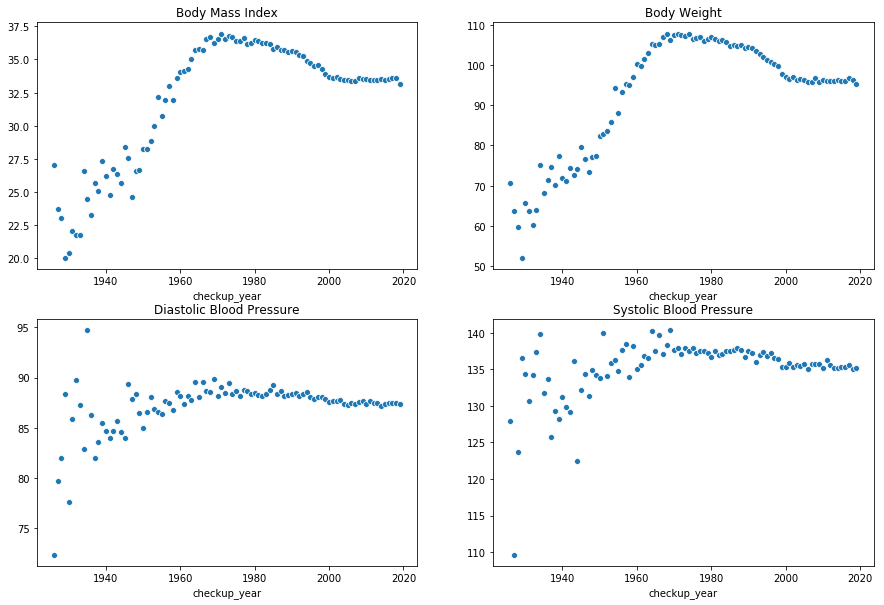

In [251]:
fig,ax = plt.subplots(2,2,figsize = (15,10))
ax = [j for i in ax for j in i]
for i, col in enumerate(adults_health.columns):
    col_metrics = adults_health.groupby(adults_health.index.get_level_values(level = 'checkup_year'))[col].mean()
    sns.scatterplot(col_metrics.index,col_metrics.values,ax = ax[i])
    ax[i].set_title(col)

- Between 1960 and 2000, the population was quite overweight (Both BMI and body weight confirm that!)
- Blood pressure levels also seem to be consistently high
    - Diastolic BP should ideally be in the range 60-80 and Systolic BP in range 90-120. Although, we see a decline in body weight after 200s, but BP levels seem to be consistently high. 
    
### Observations:
- Apart from addiction issues, people in Massandapolis also seem to suffering from other health issues (Obesity/ Diabetes/ Hyptertension).